In [1]:
%load_ext wurlitzer
import glob
import os
from xspec import *
from stingray import Lightcurve
from astropy.io import fits
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [12,8]
os.chdir('pps/')

Fit.statMethod = "chi"
Fit.nIterations = 100000
Fit.delta = 1e-4
Fit.criticalDelta = 1e-4


1 spectrum  in use
 
Spectral Data File: P0886040201PNS003SRSPEC0014.FTZ  Spectrum 1
Net count rate (cts/s) for Spectrum:1  5.760e-03 +/- 9.183e-04 (38.4 % total)
 Assigned to Data Group 1 and Plot Group 1
  Noticed Channels:  1-13
  Telescope: XMM Instrument: EPN  Channel Type: PI
  Exposure Time: 1.808e+04 sec
 Using fit statistic: chi
 Using Background File                P0886040201PNS003BGSPEC0014.FTZ
  Background Exposure Time: 1.808e+04 sec
 Using Response (RMF) File            epn_e3_ff20_sdY9.rmf for Source 1
 Using Auxiliary Response (ARF) File  P0886040201PNS003SRCARF0014.FTZ



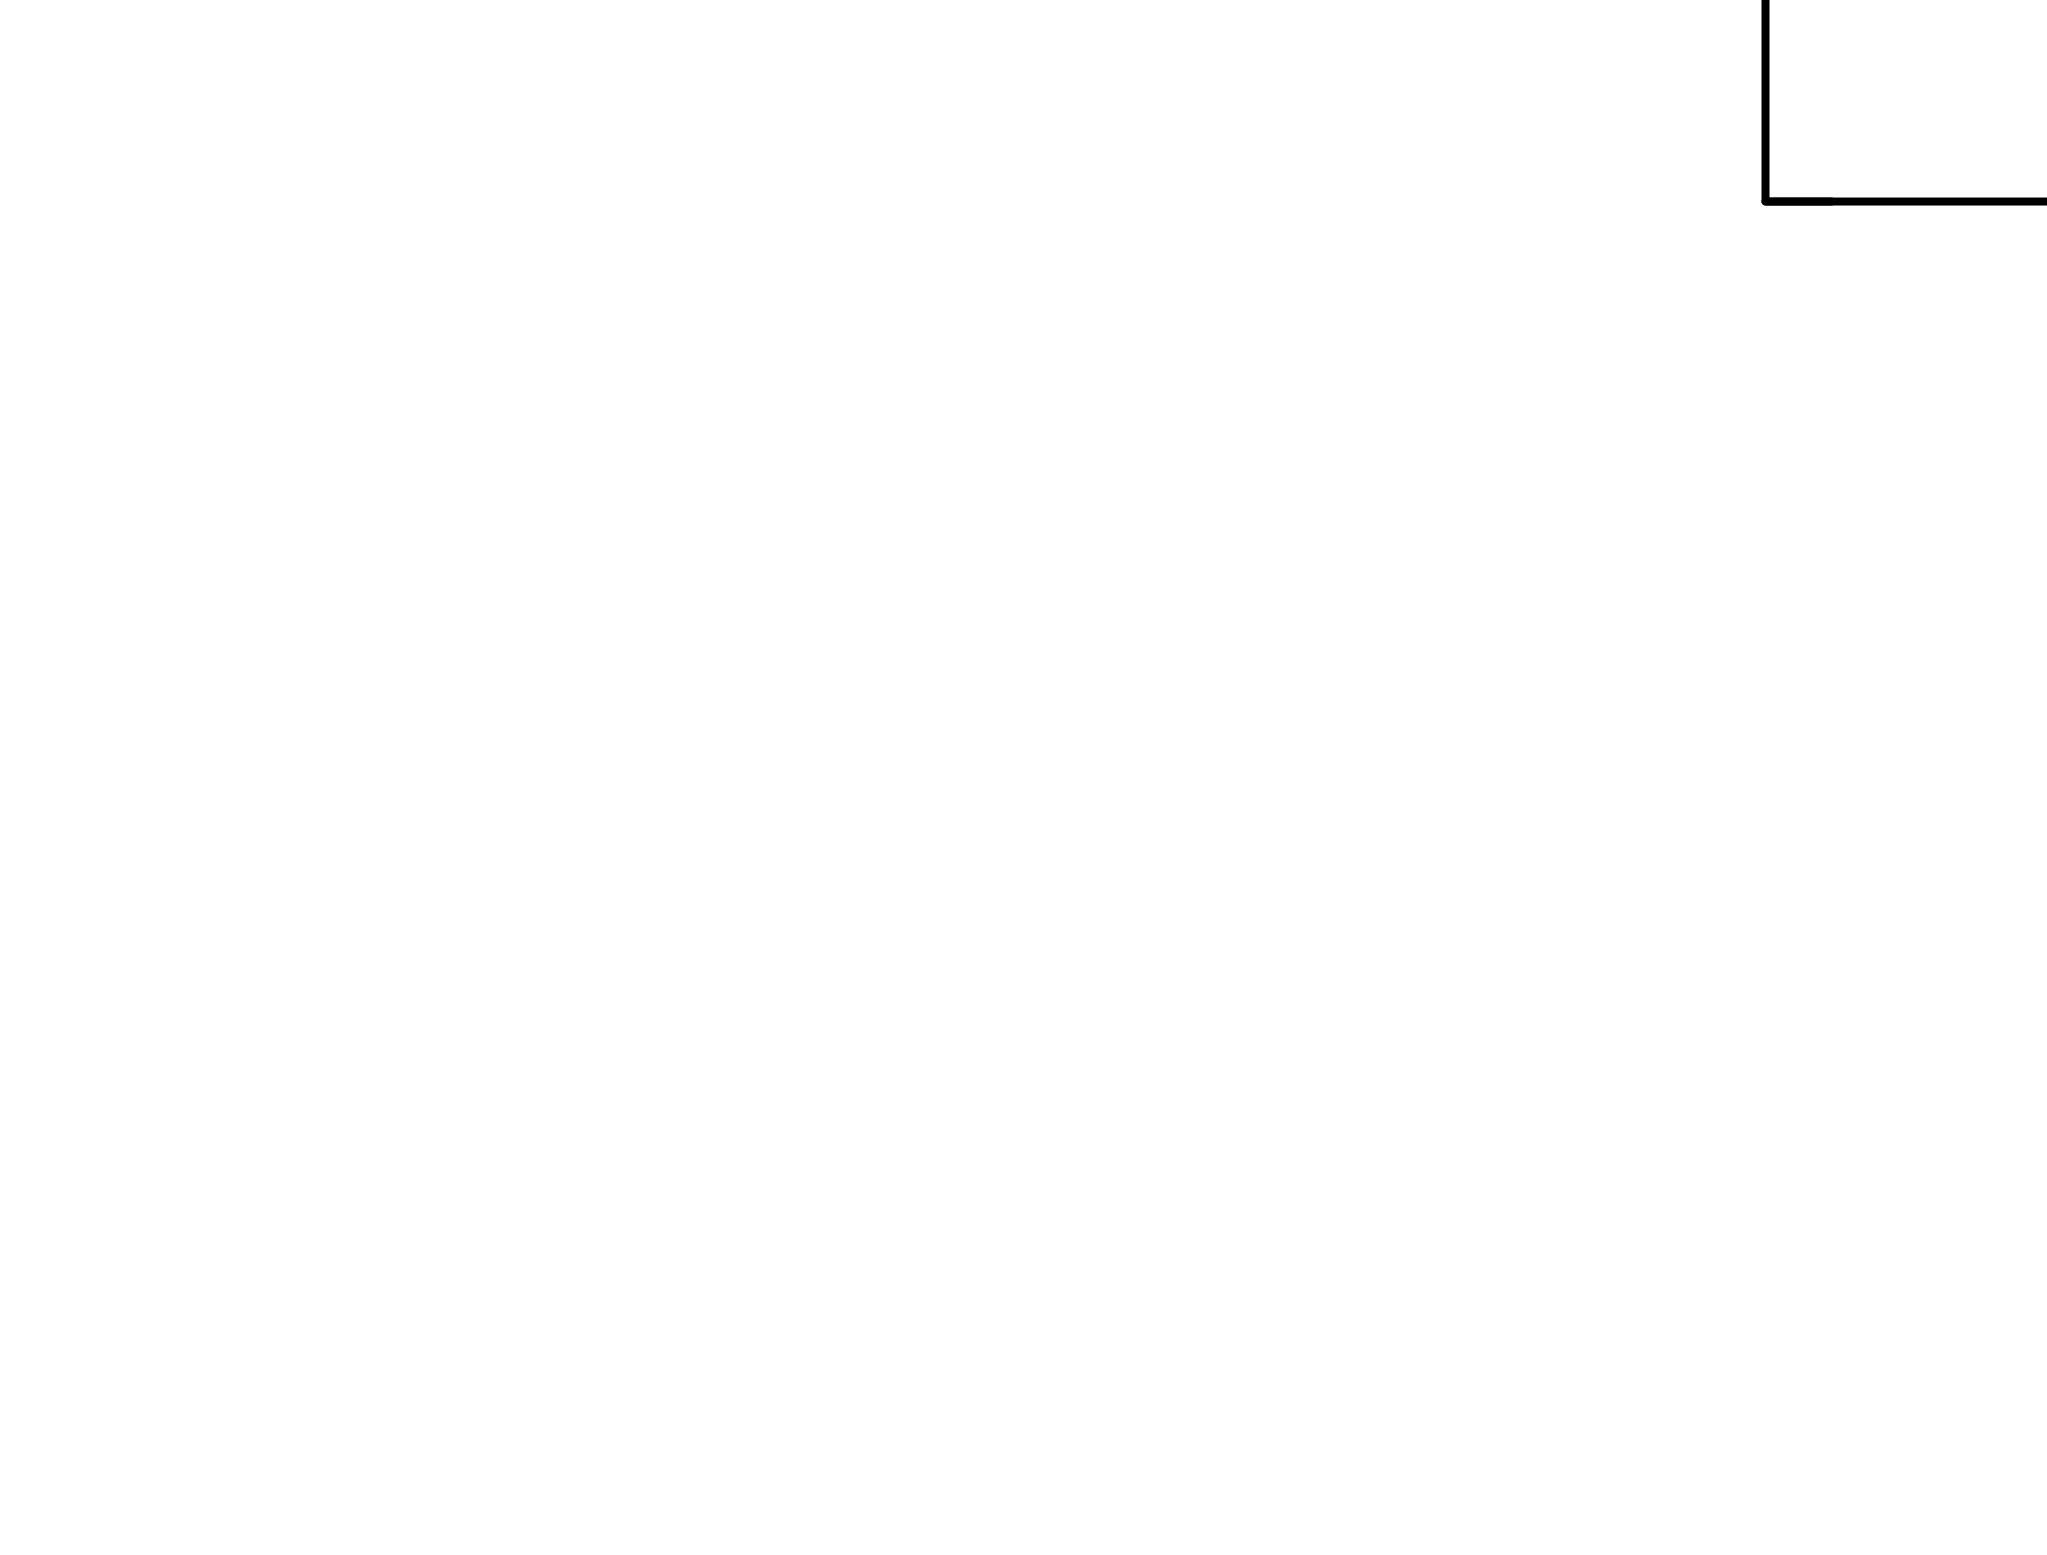

In [2]:
spec_fnames = glob.glob('P*PNS*SRSPEC*.FTZ')

spec = Spectrum(spec_fnames[0])
Plot.device="/svg"
Plot.xAxis="keV"
Plot.xLog=True
Plot.yLog=True
Plot.addCommand("Rescale Y 0.00001 0.005")
Plot("data")

      No channels ignored (no channels in specified range)
     1 channels (13) ignored in spectrum #     1


Model TBabs<1>*bbody<2> Source No.: 1   Active/On
Model Model Component  Parameter  Unit     Value
 par  comp
   1    1   TBabs      nH         10^22    1.00000      +/-  0.0          
   2    2   bbody      kT         keV      3.00000      +/-  0.0          
   3    2   bbody      norm                1.00000      +/-  0.0          
________________________________________________________________________

tbvabs Version 2.3
Cosmic absorption with grains and H2, modified from
Wilms, Allen, & McCray, 2000, ApJ 542, 914-924
Questions: Joern Wilms
joern.wilms@sternwarte.uni-erlangen.de
joern.wilms@fau.de

http://pulsar.sternwarte.uni-erlangen.de/wilms/research/tbabs/

PLEASE NOTICE:
To get the model described by the above paper
you will also have to set the abundances:
   abund wilm

Note that this routine ignores the current cross section setting
as it always HAS to use the Verner

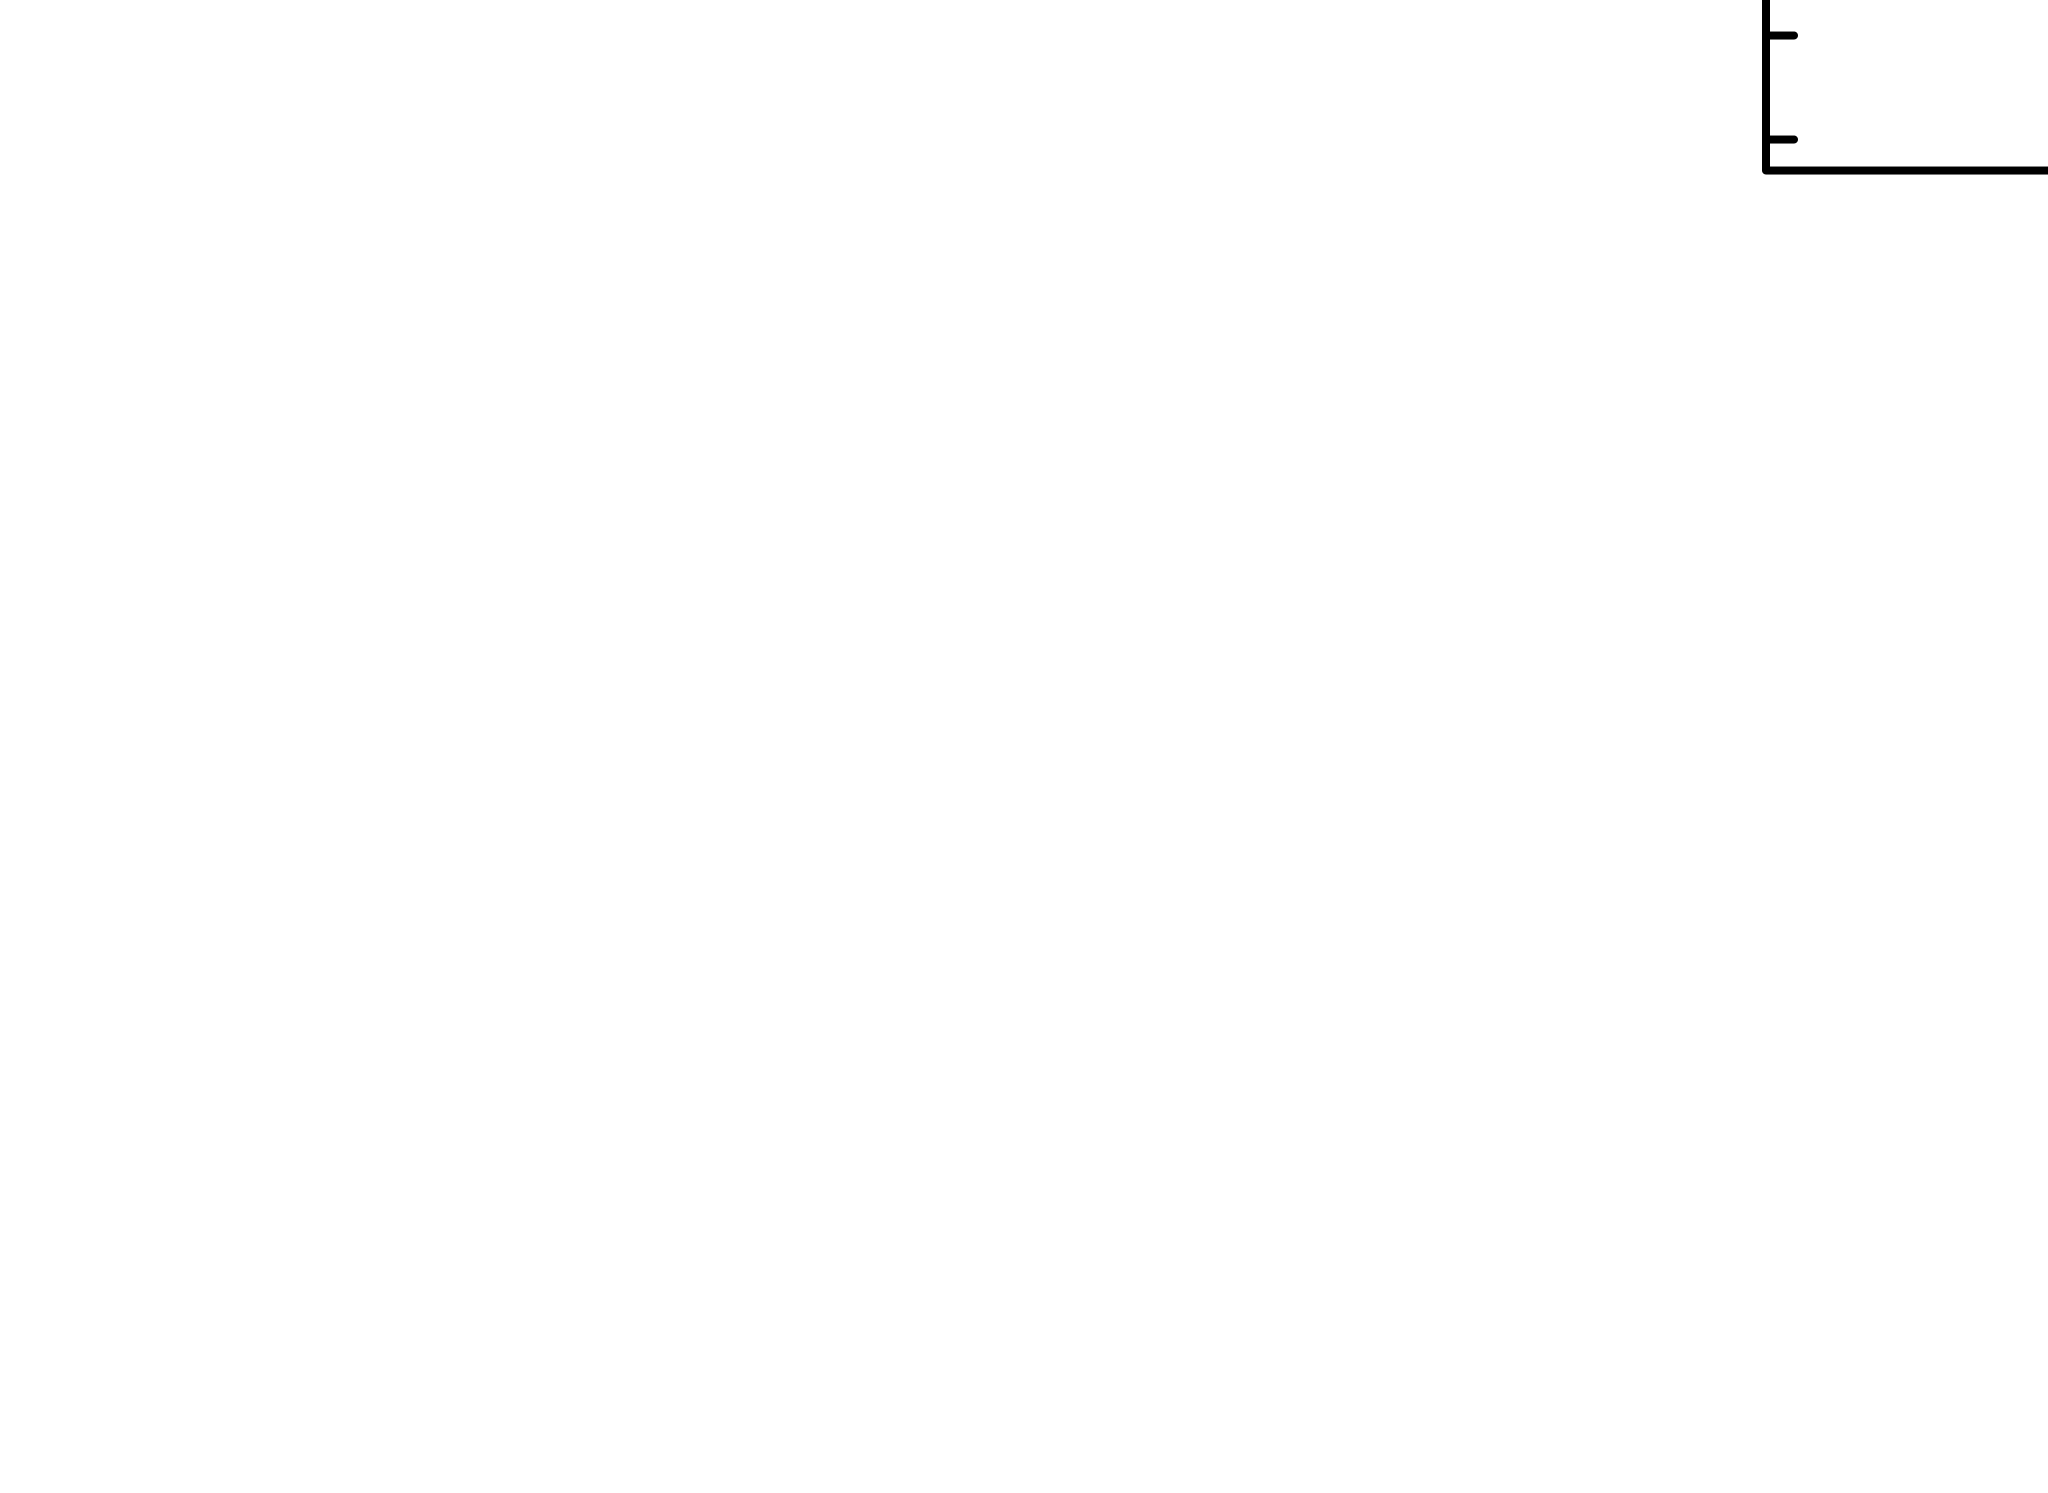

In [3]:
spec.ignore("**-0.2 12.0-**")
mo = Model("tbabs*bbody")
Fit.perform()
Plot("data resid")


Model TBabs<1>*powerlaw<2> Source No.: 1   Active/On
Model Model Component  Parameter  Unit     Value
 par  comp
   1    1   TBabs      nH         10^22    1.00000      +/-  0.0          
   2    2   powerlaw   PhoIndex            1.00000      +/-  0.0          
   3    2   powerlaw   norm                1.00000      +/-  0.0          
________________________________________________________________________


Fit statistic  : Chi-Squared              3.196836e+11     using 12 bins.

Test statistic : Chi-Squared              3.196836e+11     using 12 bins.
 Null hypothesis probability of 0.000000e+00 with 9 degrees of freedom
 Current data and model not fit yet.
                                   Parameters
Chi-Squared  |beta|/N    Lvl          1:nH    2:PhoIndex        3:norm
8.94467      0.62441      -3       1.01775       1.20324   1.29726e-05
8.93081      17614.5      -4       1.02105       1.20265   1.32402e-05
8.93081      10.3169      -5       1.02173       1.20318   1.32508e-05

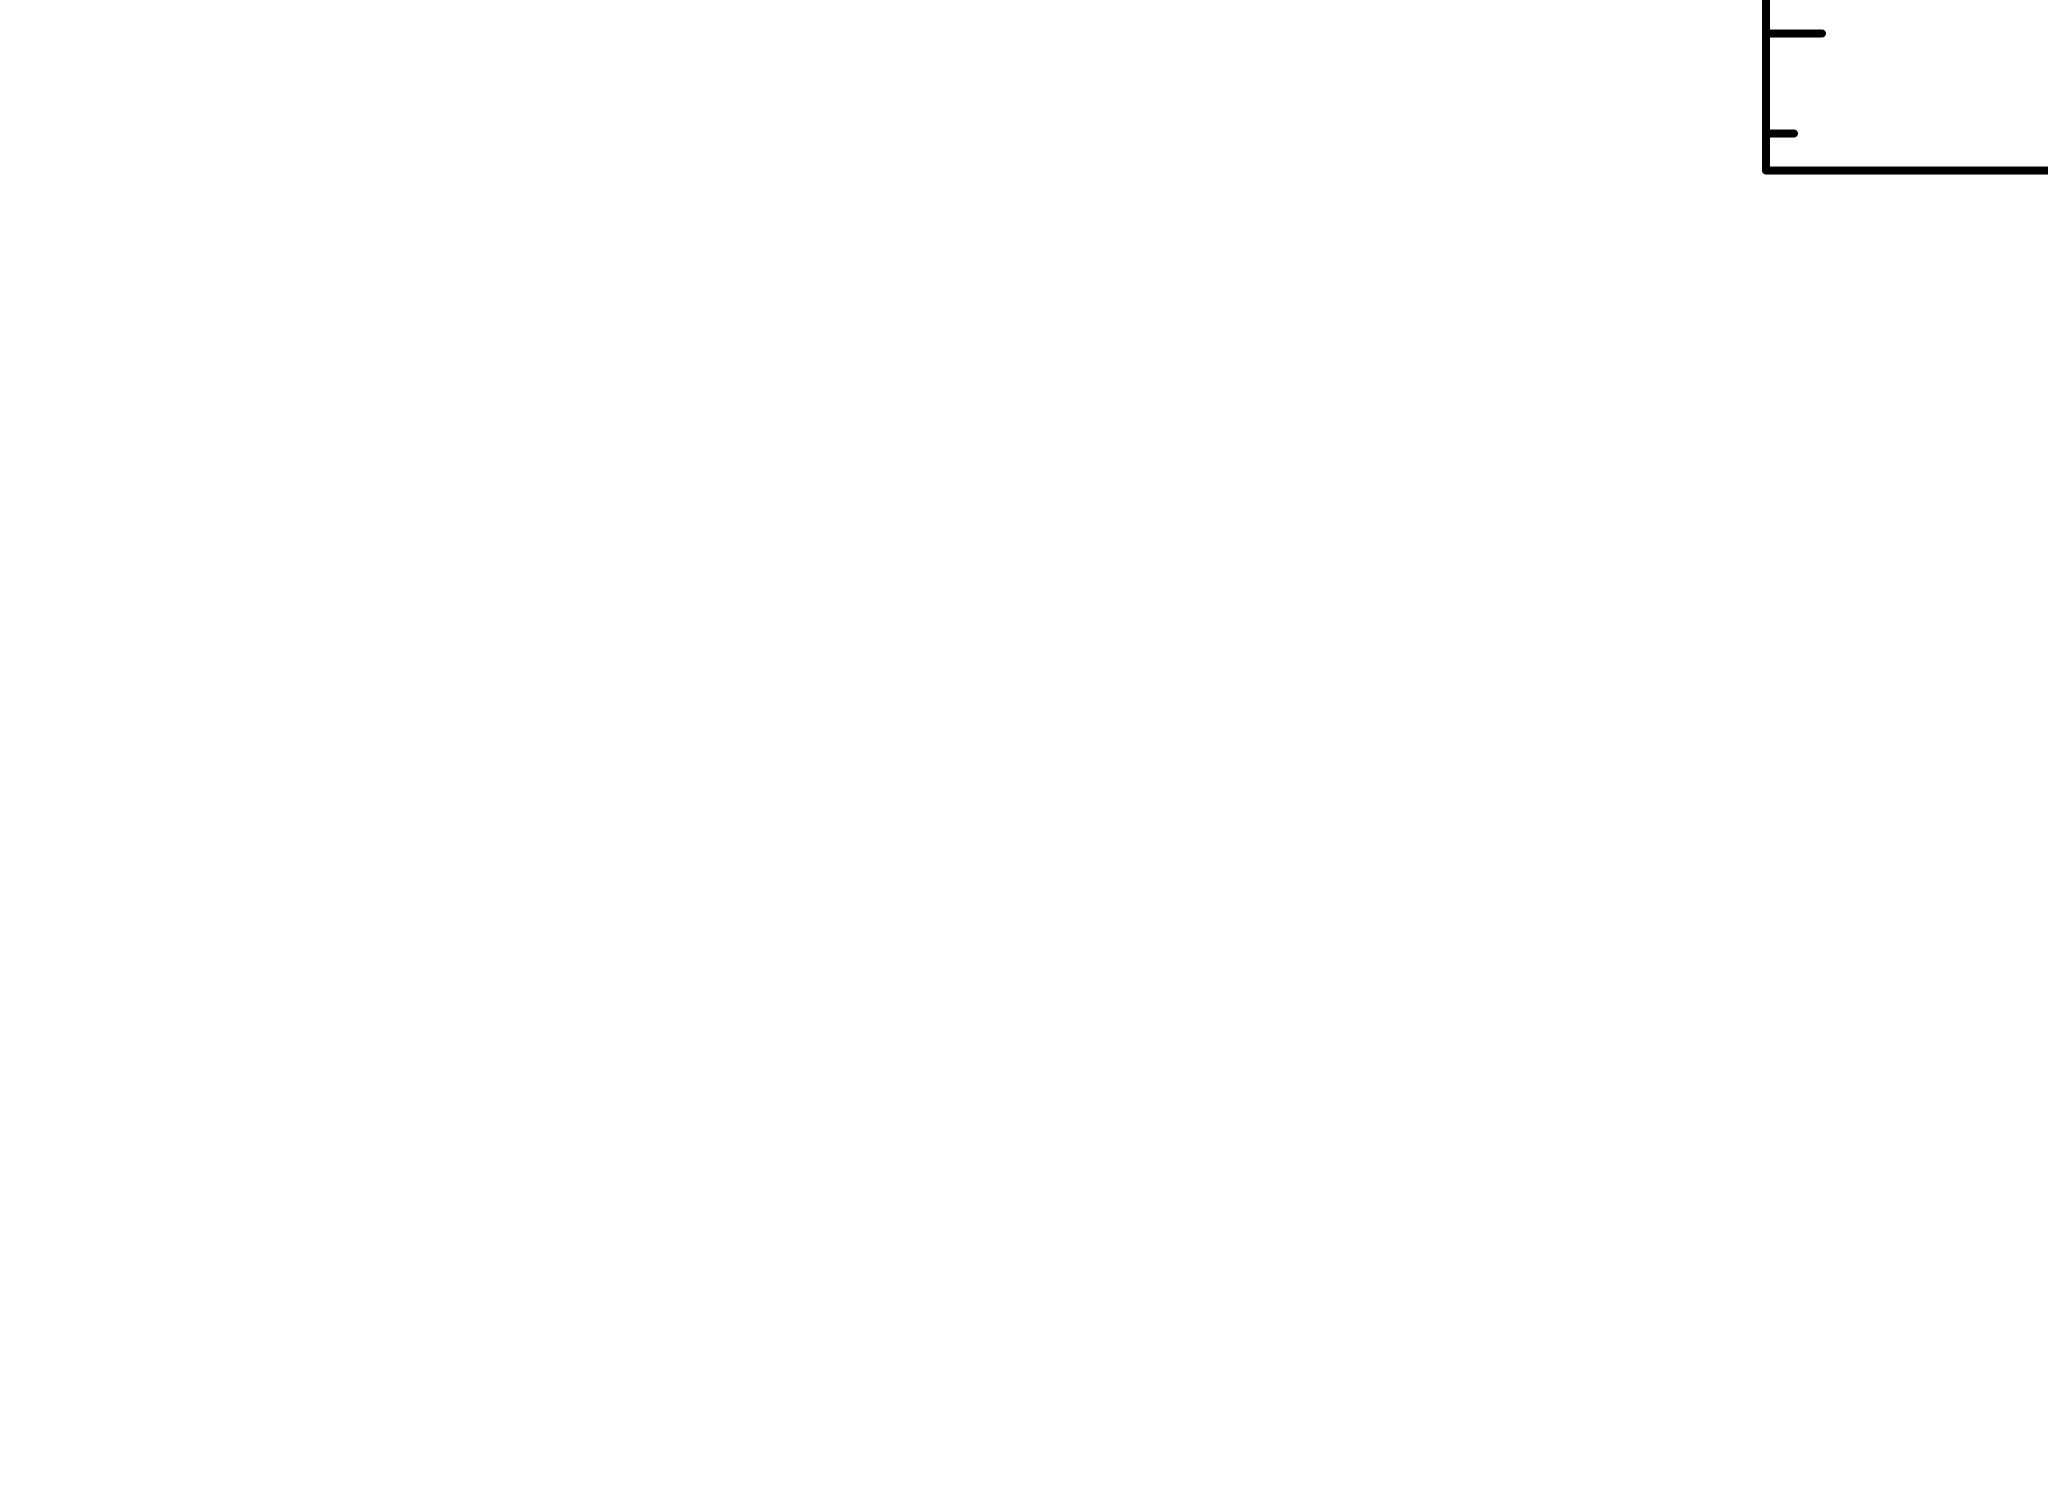

In [4]:
AllModels.clear()
mo = Model("tbabs*powerlaw")
Fit.perform()
Plot("data resid")


Model TBabs<1>*bremss<2> Source No.: 1   Active/On
Model Model Component  Parameter  Unit     Value
 par  comp
   1    1   TBabs      nH         10^22    1.00000      +/-  0.0          
   2    2   bremss     kT         keV      7.00000      +/-  0.0          
   3    2   bremss     norm                1.00000      +/-  0.0          
________________________________________________________________________


Fit statistic  : Chi-Squared              5.685390e+10     using 12 bins.

Test statistic : Chi-Squared              5.685390e+10     using 12 bins.
 Null hypothesis probability of 0.000000e+00 with 9 degrees of freedom
 Current data and model not fit yet.
                                   Parameters
Chi-Squared  |beta|/N    Lvl          1:nH          2:kT        3:norm
10.2696      0.921044     -1       1.07051       14.3924   2.14656e-05
9.30115      67921.3      -2      0.990905       36.1478   2.48938e-05
8.95469      31518.4      -3       1.01195       78.8910   3.19585e-05
8

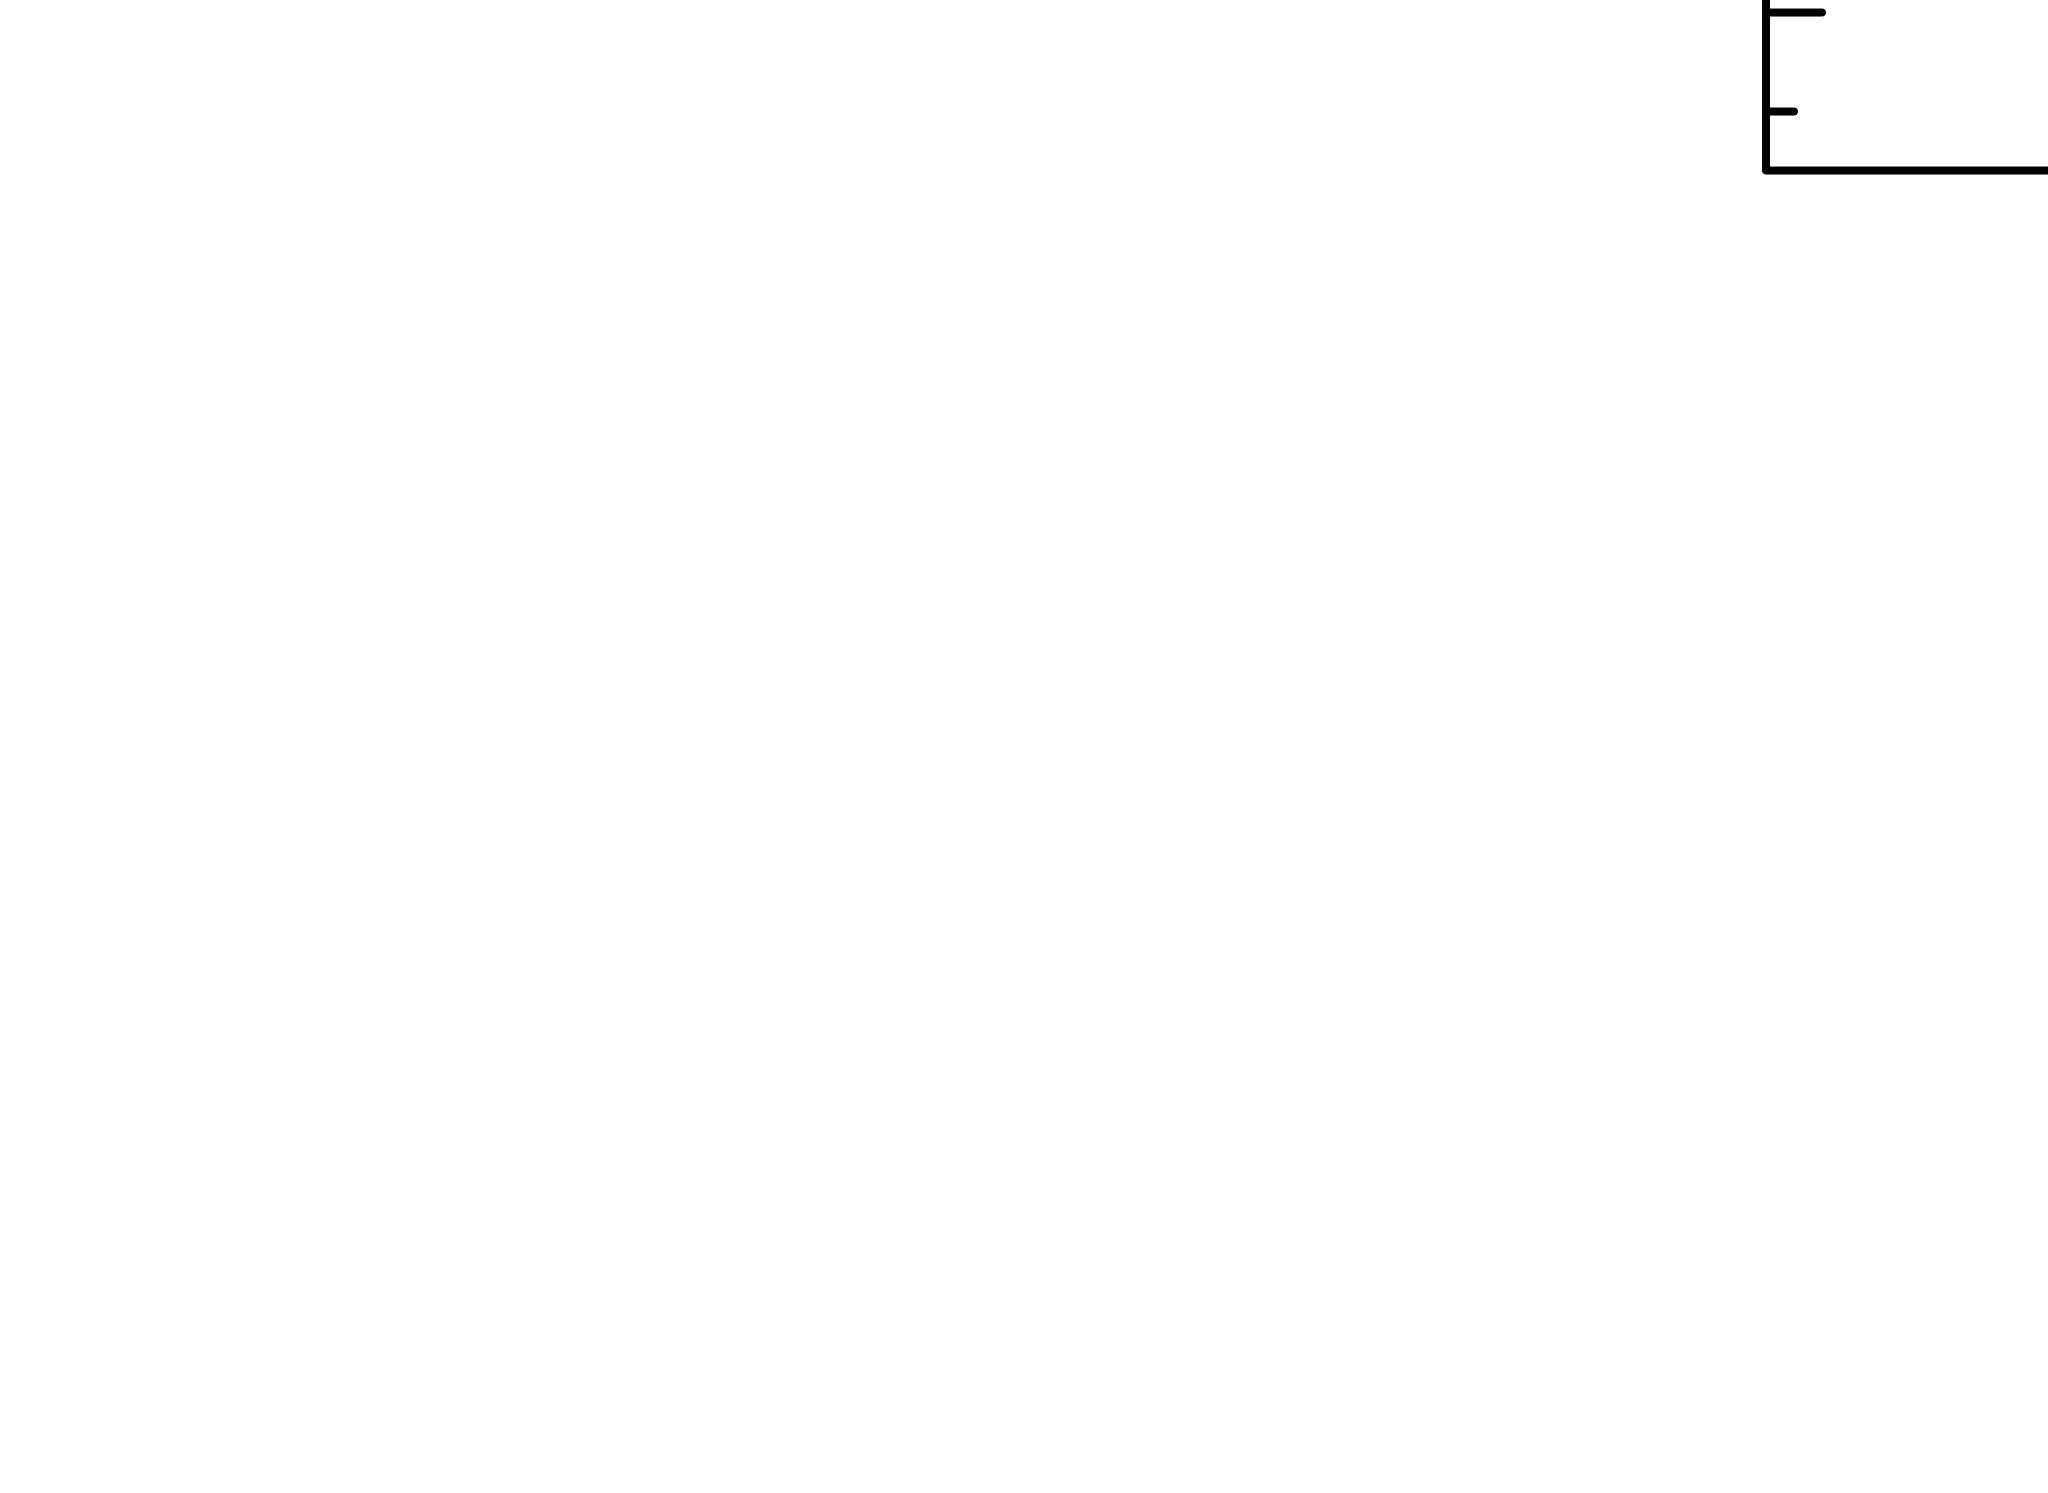

In [5]:
AllModels.clear()
mo = Model("tbabs*bremss")
Fit.perform()
Plot("data resid")


Model TBabs<1>*apec<2> Source No.: 1   Active/On
Model Model Component  Parameter  Unit     Value
 par  comp
   1    1   TBabs      nH         10^22    1.00000      +/-  0.0          
   2    2   apec       kT         keV      1.00000      +/-  0.0          
   3    2   apec       Abundanc            1.00000      frozen
   4    2   apec       Redshift            0.0          frozen
   5    2   apec       norm                1.00000      +/-  0.0          
________________________________________________________________________

Reading APEC data from 3.0.9


Fit statistic  : Chi-Squared              2.195357e+10     using 12 bins.

Test statistic : Chi-Squared              2.195357e+10     using 12 bins.
 Null hypothesis probability of 0.000000e+00 with 9 degrees of freedom
 Current data and model not fit yet.
                                   Parameters
Chi-Squared  |beta|/N    Lvl          1:nH          2:kT        5:norm
33.1369      2.95497      -2      0.545823       3.74426   1

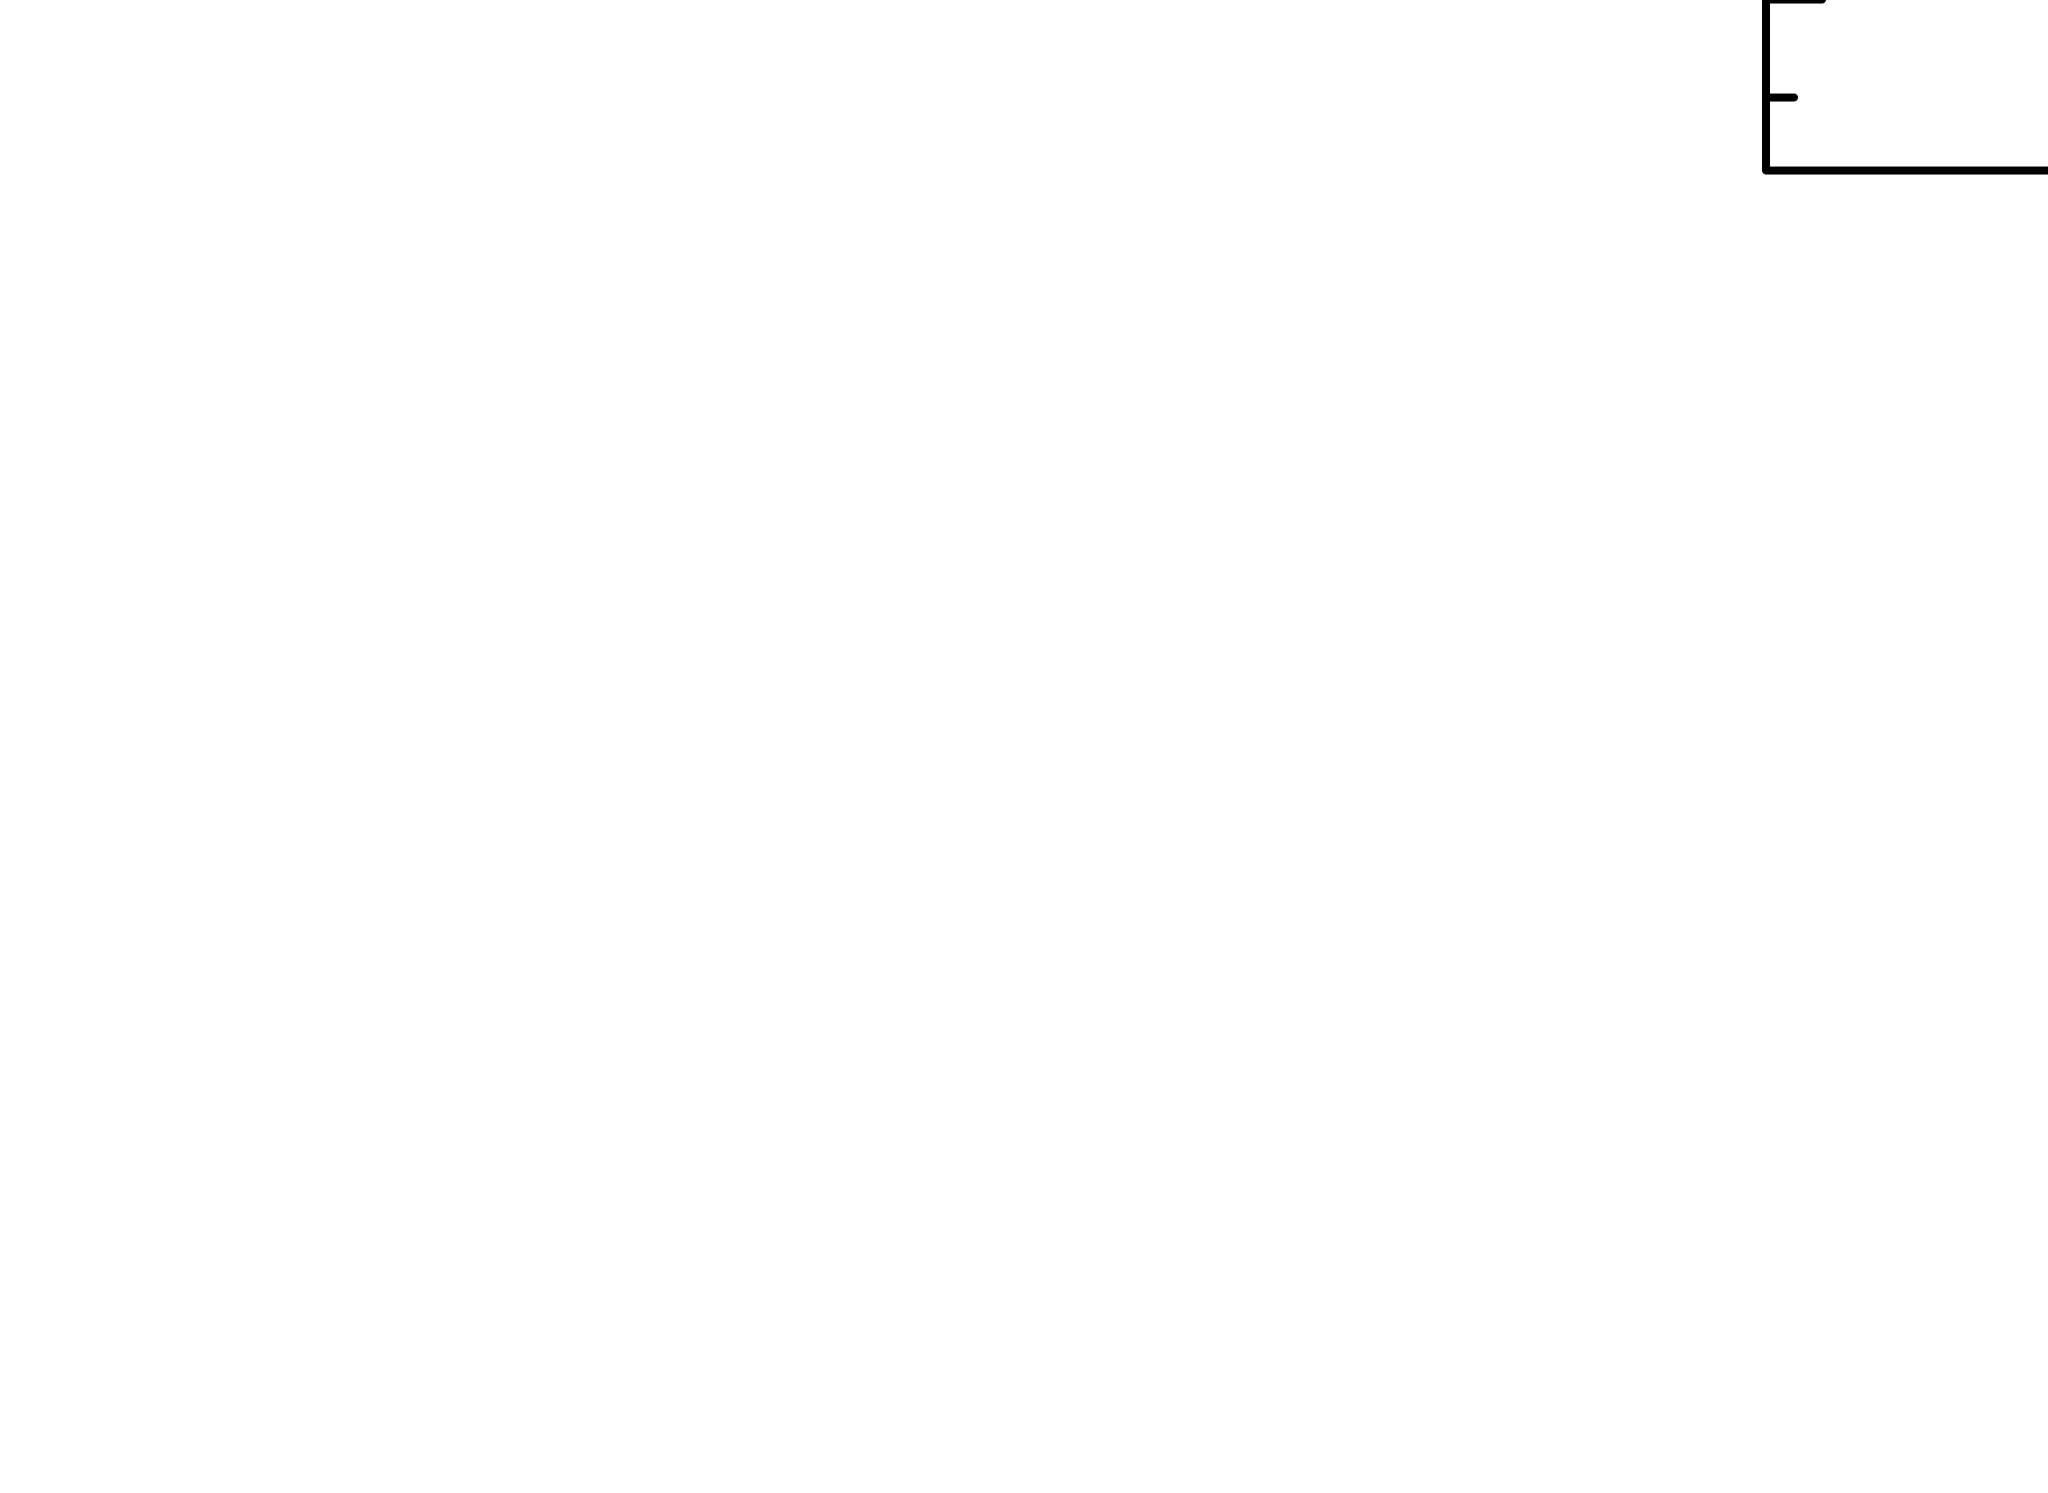

In [6]:
AllModels.clear()
mo = Model("tbabs*apec")
Fit.perform()
Plot("data resid")


Model TBabs<1>(apec<2> + apec<3>) Source No.: 1   Active/On
Model Model Component  Parameter  Unit     Value
 par  comp
   1    1   TBabs      nH         10^22    1.00000      +/-  0.0          
   2    2   apec       kT         keV      1.00000      +/-  0.0          
   3    2   apec       Abundanc            1.00000      frozen
   4    2   apec       Redshift            0.0          frozen
   5    2   apec       norm                1.00000      +/-  0.0          
   6    3   apec       kT         keV      1.00000      +/-  0.0          
   7    3   apec       Abundanc            1.00000      frozen
   8    3   apec       Redshift            0.0          frozen
   9    3   apec       norm                1.00000      +/-  0.0          
________________________________________________________________________


Fit statistic  : Chi-Squared              8.781604e+10     using 12 bins.

Test statistic : Chi-Squared              8.781604e+10     using 12 bins.
 Null hypothesis probability

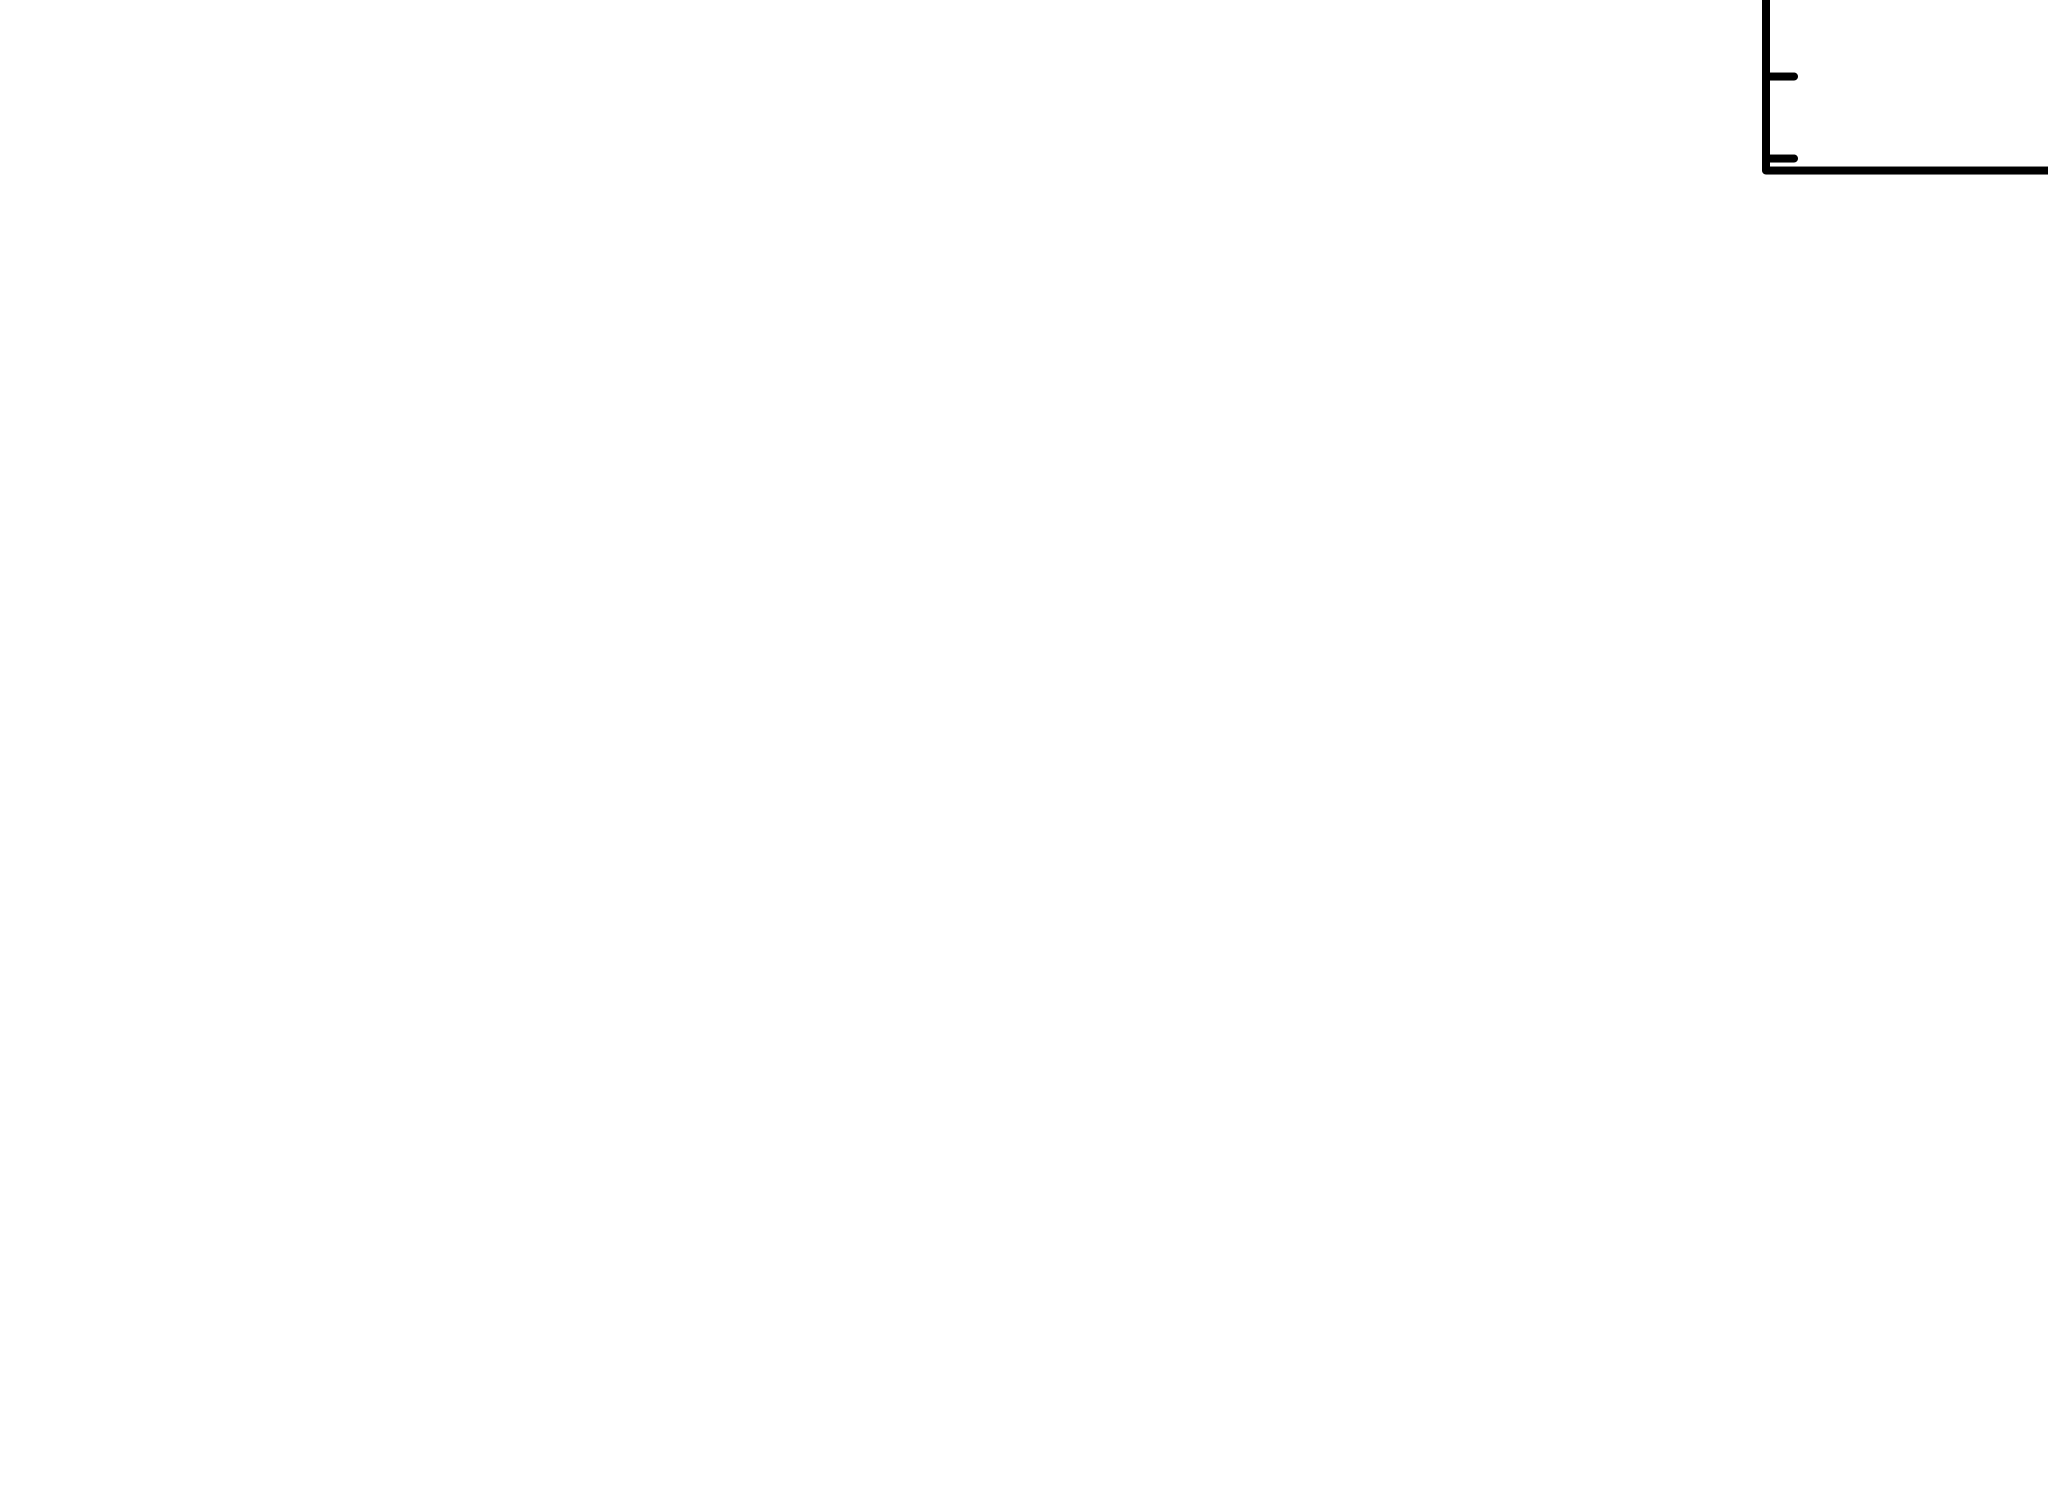

In [7]:
AllModels.clear()
mo = Model("tbabs*(apec+apec)")
mo.apec.kT = 0.5
mo.apec_3.kT = 4
Fit.perform()
Plot("data resid")

In [8]:
AllModels.calcFlux(".2 12.0")

 Model Flux 1.7489e-05 photons (1.1126e-13 ergs/cm^2/s) range (0.20000 - 12.000 keV)


In [9]:
plx = 1.0285
d_kpc = 1/plx
F_x = 1.1126*10**-13

L_x = 4*3.14*F_x*(d_kpc*3.086*10**21)**2
print(L_x)

1.258090683799285e+31
